In [1]:
#import packages 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Setting to make numbers easier to read on display
pd.options.display.float_format = '{:20.3f}'.format

# Show all columns on output
pd.set_option('display.max_columns', 999)

#### Data Exploration

In [2]:
# read the dataset
df = pd.read_excel(r"./dataset/online_retail_II.xlsx", sheet_name=0)

# show the first 10 rows of the dataset
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.950,13085.000,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750,13085.000,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750,13085.000,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.100,13085.000,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.250,13085.000,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.650,13085.000,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.250,13085.000,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.950,13085.000,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.550,13085.000,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.750,13085.000,United Kingdom


In [3]:
# to show the total entires, datatype and count of each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [4]:
#describ the numeric data (we have 4 numerical data as showen in info())
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000,525461,525461.000,417534.000
mean,10.338,2010-06-28 11:37:36.845017856,4.689,15360.645
min,-9600.000,2009-12-01 07:45:00,-53594.360,12346.000
25%,1.000,2010-03-21 12:20:00,1.250,13983.000
50%,3.000,2010-07-06 09:51:00,2.100,15311.000
75%,10.000,2010-10-15 12:45:00,4.210,16799.000
max,19152.000,2010-12-09 20:01:00,25111.090,18287.000
std,107.424,NaN,146.127,1680.811


In [5]:
# describe object data (we have 4 objects as showen in info())
df.describe(include="O")


,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [6]:
#show sample of missing values for Customer ID 
df[df["Customer ID"].isna()].head(10)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.000,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.000,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.000,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.000,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.550,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.850,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.950,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.250,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.950,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.650,NaN,United Kingdom


In [7]:
#show sample of negative data in Quantity < 0
#according to data set description:- 
#Invoice is consist of 6 digits and if it starts with capital "C" it means that this operation is canceled
df[df["Quantity"] < 0].head(10)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.950,16321.000,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.650,16321.000,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.250,16321.000,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.100,16321.000,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.950,16321.000,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.250,16321.000,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.250,16321.000,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.850,16321.000,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.950,16321.000,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.250,17592.000,United Kingdom


In [8]:
# make matched to show which data match the 6 digits as the description of dataset 
df["Invoice"] = df["Invoice"].astype("str")
# make pattern match syntax 
df[df["Invoice"].str.match("^\\d{6}$") == True]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.950,13085.000,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750,13085.000,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750,13085.000,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.100,13085.000,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.250,13085.000,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.950,17530.000,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.750,17530.000,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.750,17530.000,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.750,17530.000,United Kingdom


In [ ]:
df["Invoice"] = df["Invoice"].astype("str") # convert into string  
df[df["Invoice"].str.match("^\\d{6}$") == False]  # Filter Rows Based on Invoice Format

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.950,16321.000,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.650,16321.000,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.250,16321.000,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.100,16321.000,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.950,16321.000,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.100,12605.000,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.500,15329.000,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.950,15329.000,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.750,15329.000,United Kingdom


In [10]:
#remove all numeric characters to return nun-numeric 
df["Invoice"].str.replace("[0-9]", "", regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [11]:
#show data which start wit "A"
df[df["Invoice"].str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.360,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.790,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.870,NaN,United Kingdom


In [ ]:
df["StockCode"] = df["StockCode"].astype("str")
df[(df["StockCode"].str.match("^\\d{5}$") == False) & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == False)]["StockCode"].unique()
# ilter and Identify Unique Stock Codes and check tjat it is start with 5 digits followed by one or more letter 

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

In [ ]:
#we will do this step for all the outpout for previous step
df[df["StockCode"].str.contains("^DOT")]

#checks each value in the "StockCode" column to see if it contains a substring that matches the specified pattern

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2379,489597,DOT,DOTCOM POSTAGE,1,2009-12-01 14:28:00,647.190,NaN,United Kingdom
2539,489600,DOT,DOTCOM POSTAGE,1,2009-12-01 14:43:00,55.960,NaN,United Kingdom
2551,489601,DOT,DOTCOM POSTAGE,1,2009-12-01 14:44:00,68.390,NaN,United Kingdom
2571,489602,DOT,DOTCOM POSTAGE,1,2009-12-01 14:45:00,59.350,NaN,United Kingdom
2619,489603,DOT,DOTCOM POSTAGE,1,2009-12-01 14:46:00,42.390,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524272,538071,DOT,DOTCOM POSTAGE,1,2010-12-09 14:09:00,885.940,NaN,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.320,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.680,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.940,NaN,United Kingdom


In [14]:
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.950,13085.000,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750,13085.000,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750,13085.000,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.100,13085.000,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.250,13085.000,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.650,13085.000,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.250,13085.000,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.950,13085.000,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.550,13085.000,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.750,13085.000,United Kingdom


### Data Cleaning

In [ ]:
cleaned_df = df.copy()
# make a copy to work on it to avoid the risk of lossing the original data 

In [16]:
# clean the Invoice column as described in the dataset to be 6 digits
cleaned_df["Invoice"] = cleaned_df["Invoice"].astype("str")

mask = (
    cleaned_df["Invoice"].str.match("^\\d{6}$") == True
)

cleaned_df = cleaned_df[mask]

cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.950,13085.000,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750,13085.000,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750,13085.000,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.100,13085.000,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.250,13085.000,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.950,17530.000,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.750,17530.000,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.750,17530.000,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.750,17530.000,United Kingdom


In [17]:
# clean the StockCode column as described in the dataset to be 5 digits

cleaned_df["StockCode"] = cleaned_df["StockCode"].astype("str")

mask = (
    (cleaned_df["StockCode"].str.match("^\\d{5}$") == True)
    | (cleaned_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == True)
    | (cleaned_df["StockCode"].str.match("^PADS$") == True)
)

cleaned_df = cleaned_df[mask]

cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.950,13085.000,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750,13085.000,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750,13085.000,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.100,13085.000,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.250,13085.000,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.950,17530.000,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.750,17530.000,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.750,17530.000,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.750,17530.000,United Kingdom


In [18]:
#drop null values in Customer ID column 
cleaned_df.dropna(subset=["Customer ID"], inplace=True)


C:\Users\walid\AppData\Local\Temp\ipykernel_20704\3799363136.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.dropna(subset=["Customer ID"], inplace=True)


In [19]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406337.000,406337,406337.000,406337.000
mean,13.619,2010-07-01 10:11:06.543288320,2.991,15373.633
min,1.000,2009-12-01 07:45:00,0.000,12346.000
25%,2.000,2010-03-26 14:01:00,1.250,14004.000
50%,5.000,2010-07-09 15:48:00,1.950,15326.000
75%,12.000,2010-10-14 17:09:00,3.750,16814.000
max,19152.000,2010-12-09 20:01:00,295.000,18287.000
std,97.001,NaN,4.286,1677.366


In [20]:
#check for zero prices
len(cleaned_df[cleaned_df["Price"] == 0])

28

In [21]:
#choose all values above zero for price column
cleaned_df = cleaned_df[cleaned_df["Price"] > 0.0]

In [22]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406309.000,406309,406309.000,406309.000
mean,13.618,2010-07-01 10:14:25.869572352,2.992,15373.722
min,1.000,2009-12-01 07:45:00,0.001,12346.000
25%,2.000,2010-03-26 14:01:00,1.250,14006.000
50%,5.000,2010-07-09 15:48:00,1.950,15326.000
75%,12.000,2010-10-14 17:09:00,3.750,16814.000
max,19152.000,2010-12-09 20:01:00,295.000,18287.000
std,96.999,NaN,4.286,1677.329


In [23]:
# check the remaining of data to know how much data we lost in the step of data cleaning 
len(cleaned_df)/len(df)

0.7732429238325965

### Feature Engineering

In [24]:
# create new column "SalesLineTotal"
cleaned_df["SalesLineTotal"] = cleaned_df["Quantity"] * cleaned_df["Price"]

cleaned_df

C:\Users\walid\AppData\Local\Temp\ipykernel_20704\1368074759.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["SalesLineTotal"] = cleaned_df["Quantity"] * cleaned_df["Price"]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLineTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.950,13085.000,United Kingdom,83.400
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750,13085.000,United Kingdom,81.000
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750,13085.000,United Kingdom,81.000
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.100,13085.000,United Kingdom,100.800
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.250,13085.000,United Kingdom,30.000
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.950,17530.000,United Kingdom,5.900
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.750,17530.000,United Kingdom,3.750
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.750,17530.000,United Kingdom,3.750
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.750,17530.000,United Kingdom,7.500


In [ ]:
# aggregate data according to customer ID 
aggregated_df = cleaned_df.groupby(by="Customer ID", as_index=False).agg(MonetaryValue=("SalesLineTotal", "sum"),
                                                                         Frequency=("Invoice", "nunique"),
                                                                         LastInvoiceDate=("InvoiceDate", "max"))

aggregated_df.head(5)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.000,169.360,2,2010-06-28 13:53:00
1,12347.000,1323.320,2,2010-12-07 14:57:00
2,12348.000,221.160,1,2010-09-27 14:59:00
3,12349.000,2221.140,2,2010-10-28 08:23:00
4,12351.000,300.930,1,2010-11-29 15:23:00


In [ ]:
max_invoice_date = aggregated_df["LastInvoiceDate"].max()

aggregated_df["Recency"] = (max_invoice_date - aggregated_df["LastInvoiceDate"]).dt.days

aggregated_df.head(5)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.000,169.360,2,2010-06-28 13:53:00,164
1,12347.000,1323.320,2,2010-12-07 14:57:00,2
2,12348.000,221.160,1,2010-09-27 14:59:00,73
3,12349.000,2221.140,2,2010-10-28 08:23:00,42
4,12351.000,300.930,1,2010-11-29 15:23:00,10


## we clacualate all of those ( Recency - Frequency - MonetaryValue) to see if we have outliers in dataset to reach the stability point

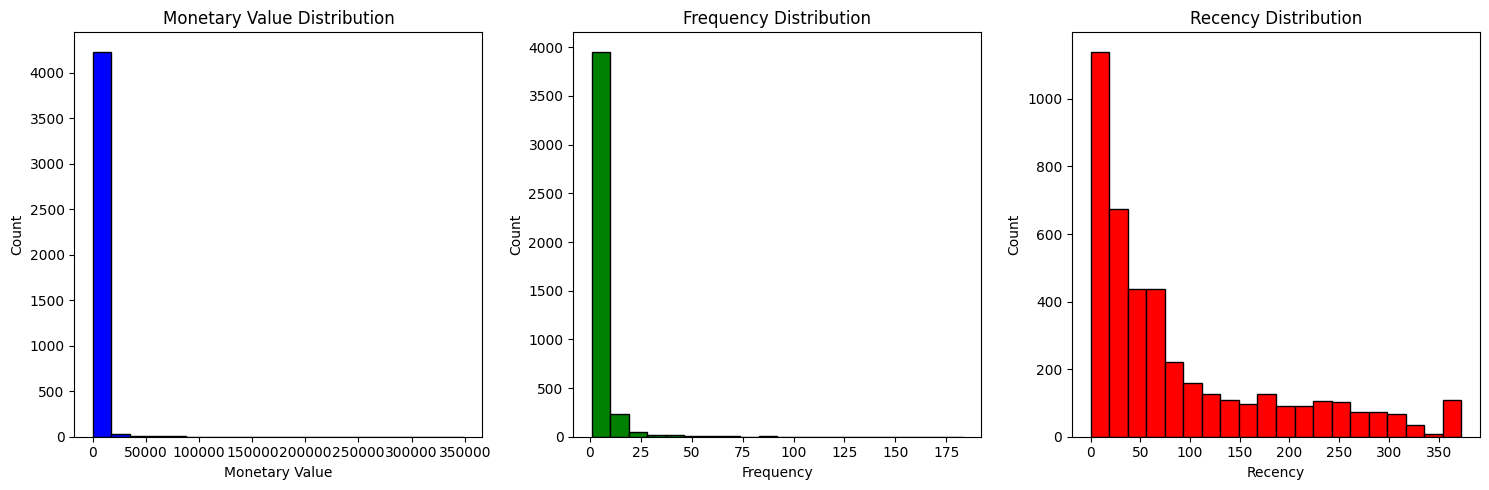

In [ ]:
# use histogrames to plot out diffrent features to look up the distributions
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(aggregated_df['MonetaryValue'], bins=20, color='blue', edgecolor='black')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(aggregated_df['Frequency'], bins=20, color='green', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(aggregated_df['Recency'], bins=20, color='red', edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

## Explaning the output of histograms 
- for monetartvlaus all valuse are almost fall in single bin with some outlier data 
- for Frequency all valuse are almost fall in single bin with some outlier data similarly like the monetaryvalus.
- for Recency looks quite reasonable anf pretty decent 

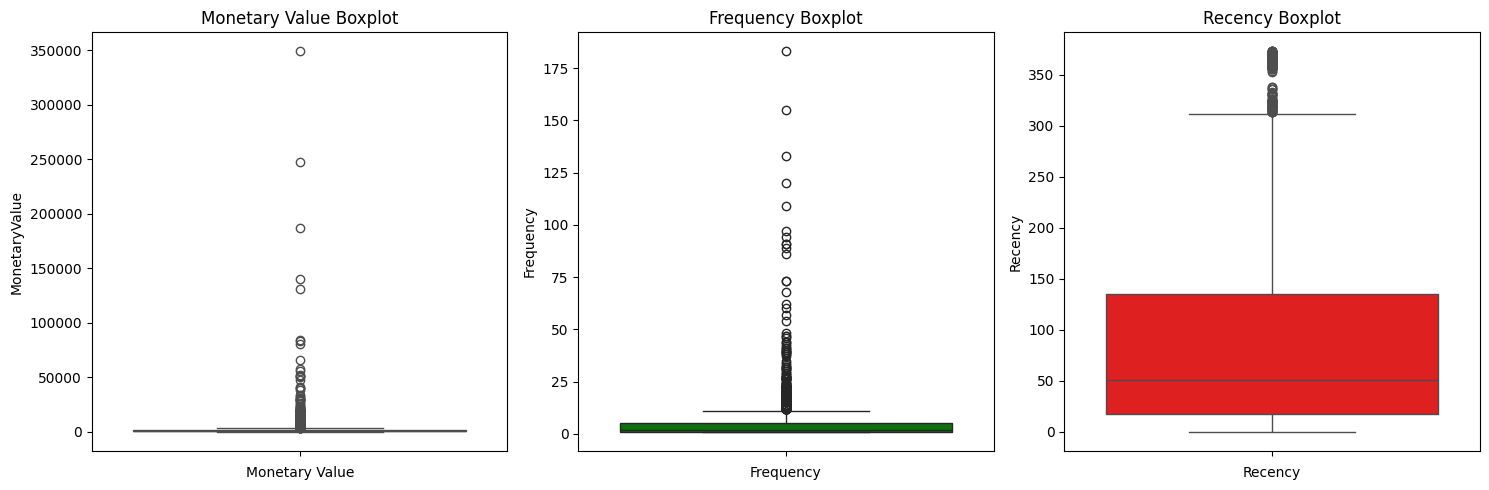

In [ ]:
# we use boxplot to check the outlires of each feature
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=aggregated_df['MonetaryValue'], color='blue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=aggregated_df['Frequency'], color='green')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=aggregated_df['Recency'], color='red')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

## Explaining the output of boxplot
- it is accepted for the Recency cause according the boxplot there are few outliers 
- not accepted for Frequency and MonetaryValus cause there are alot of outliers 

In [ ]:
#we will seperate outliers from the data and work with the remaining data
M_Q1 = aggregated_df["MonetaryValue"].quantile(0.25) # first quartile
M_Q3 = aggregated_df["MonetaryValue"].quantile(0.75) # Third quartile
M_IQR = M_Q3 - M_Q1 # Interquartile Range

monetary_outliers_df = aggregated_df[(aggregated_df["MonetaryValue"] > (M_Q3 + 1.5 * M_IQR)) | (aggregated_df["MonetaryValue"] < (M_Q1 - 1.5 * M_IQR))].copy()

monetary_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,423.000,423.000,423.000,423,423.000
mean,15103.040,12188.102,17.168,2010-11-09 12:26:02.978723328,30.035
min,12357.000,3802.040,1.000,2009-12-10 18:03:00,0.000
25%,13622.000,4605.940,8.000,2010-11-08 13:17:30,3.000
50%,14961.000,6191.320,12.000,2010-11-26 12:19:00,13.000
75%,16692.000,10273.235,18.000,2010-12-06 10:34:30,31.000
max,18260.000,349164.350,183.000,2010-12-09 19:32:00,364.000
std,1728.661,25830.851,19.730,NaN,51.541


In [30]:
F_Q1 = aggregated_df['Frequency'].quantile(0.25)
F_Q3 = aggregated_df['Frequency'].quantile(0.75)
F_IQR = F_Q3 - F_Q1

frequency_outliers_df = aggregated_df[(aggregated_df['Frequency'] > (F_Q3 + 1.5 * F_IQR)) | (aggregated_df['Frequency'] < (F_Q1 - 1.5 * F_IQR))].copy()

frequency_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,279.000,279.000,279.000,279,279.000
mean,15352.656,14409.715,23.810,2010-11-23 11:06:20.645161216,16.090
min,12437.000,1094.390,12.000,2010-05-12 16:51:00,0.000
25%,13800.000,4331.560,13.000,2010-11-20 13:14:30,2.000
50%,15465.000,6615.770,17.000,2010-12-02 10:46:00,7.000
75%,16828.500,11692.405,23.000,2010-12-07 11:08:30,19.000
max,18260.000,349164.350,183.000,2010-12-09 19:32:00,211.000
std,1748.430,31381.737,21.933,NaN,26.589


In [ ]:
# check non outliers data which will be applyird for kmeans
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(monetary_outliers_df.index)) & (~aggregated_df.index.isin(frequency_outliers_df.index))]

non_outliers_df.describe()


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3809.000,3809.000,3809.000,3809,3809.000
mean,15376.483,885.502,2.863,2010-09-03 11:16:46.516146176,97.082
min,12346.000,1.550,1.000,2009-12-01 10:49:00,0.000
25%,13912.000,279.910,1.000,2010-07-08 14:48:00,22.000
50%,15389.000,588.050,2.000,2010-10-12 16:25:00,58.000
75%,16854.000,1269.050,4.000,2010-11-17 13:14:00,154.000
max,18287.000,3788.210,11.000,2010-12-09 20:01:00,373.000
std,1693.200,817.672,2.244,NaN,98.111


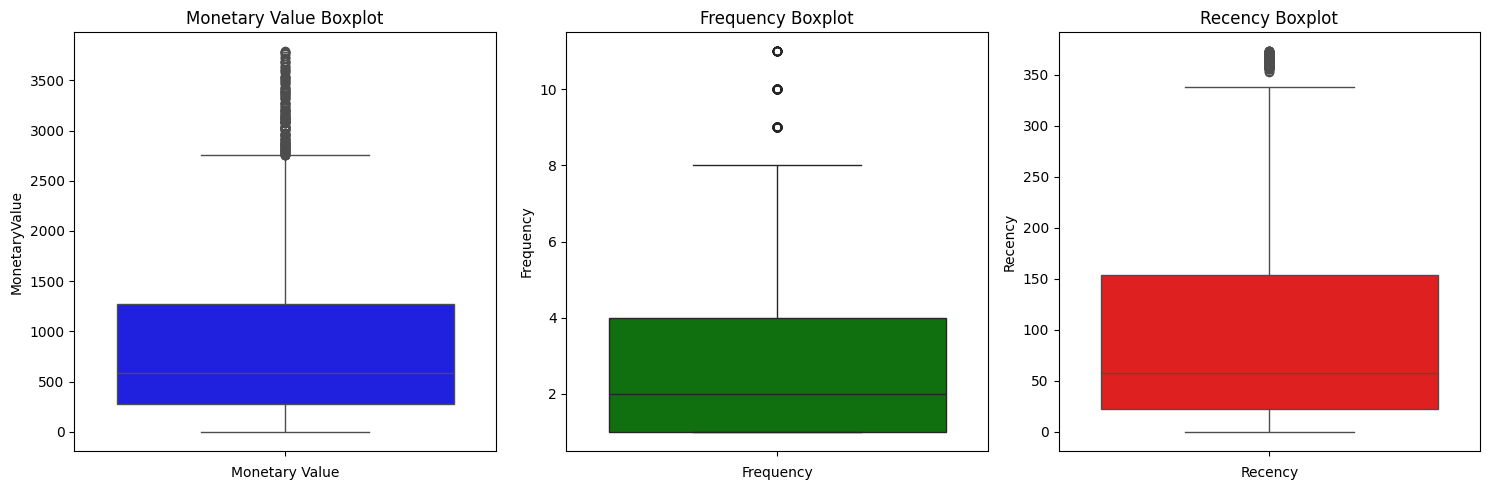

In [32]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=non_outliers_df['MonetaryValue'], color='blue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=non_outliers_df['Frequency'], color='green')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=non_outliers_df['Recency'], color='red')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

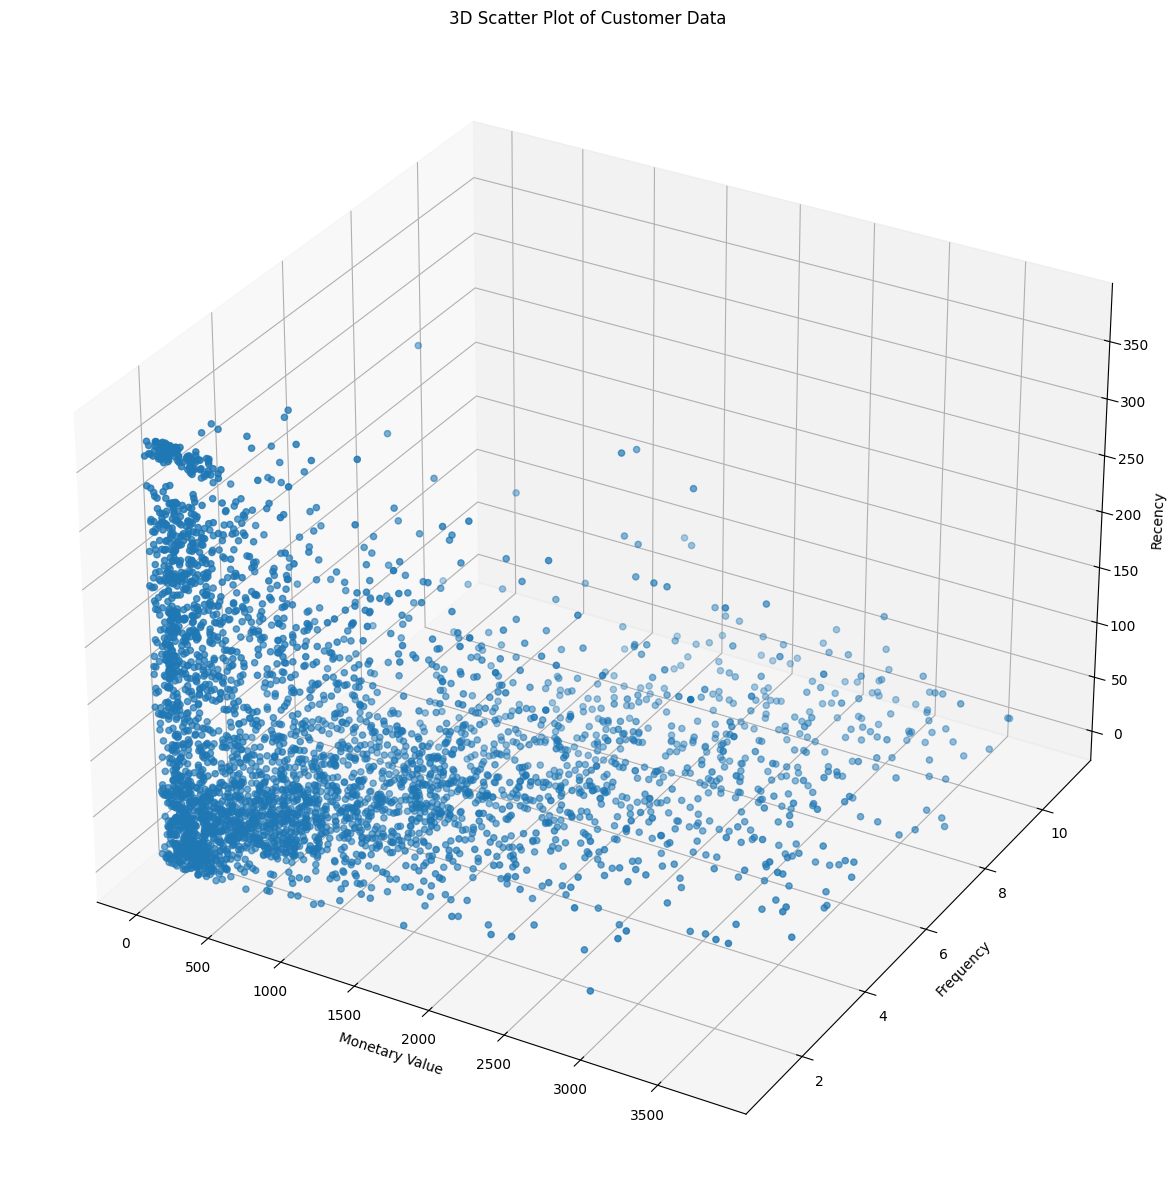

In [ ]:
fig = plt.figure(figsize=(15, 15))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(non_outliers_df["MonetaryValue"],
                     non_outliers_df["Frequency"],
                     non_outliers_df["Recency"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

In [ ]:
#choose standard scaling to transform the features of the data to be with "0" mean and standard deviation of "1"

scaler = StandardScaler()

scaled_data = scaler.fit_transform(non_outliers_df[["MonetaryValue", "Frequency", "Recency"]])

scaled_data

array([[-0.87594534, -0.38488934,  0.68214853],
       [ 0.5355144 , -0.38488934, -0.96925093],
       [-0.81258645, -0.83063076, -0.24548944],
       ...,
       [-0.62197163, -0.83063076,  2.01753946],
       [ 0.44146683, -0.38488934,  0.14187587],
       [ 1.72488781,  0.50659348, -0.81634357]])

In [35]:
scaled_data_df = pd.DataFrame(scaled_data, index=non_outliers_df.index, columns=("MonetaryValue", "Frequency", "Recency"))

scaled_data_df

,MonetaryValue,Frequency,Recency
0,-0.876,-0.385,0.682
1,0.536,-0.385,-0.969
2,-0.813,-0.831,-0.245
3,1.634,-0.385,-0.561
4,-0.715,-0.831,-0.888
...,...,...,...
4280,-0.298,1.398,-0.816
4281,-0.580,-0.831,-0.317
4282,-0.622,-0.831,2.018
4283,0.441,-0.385,0.142


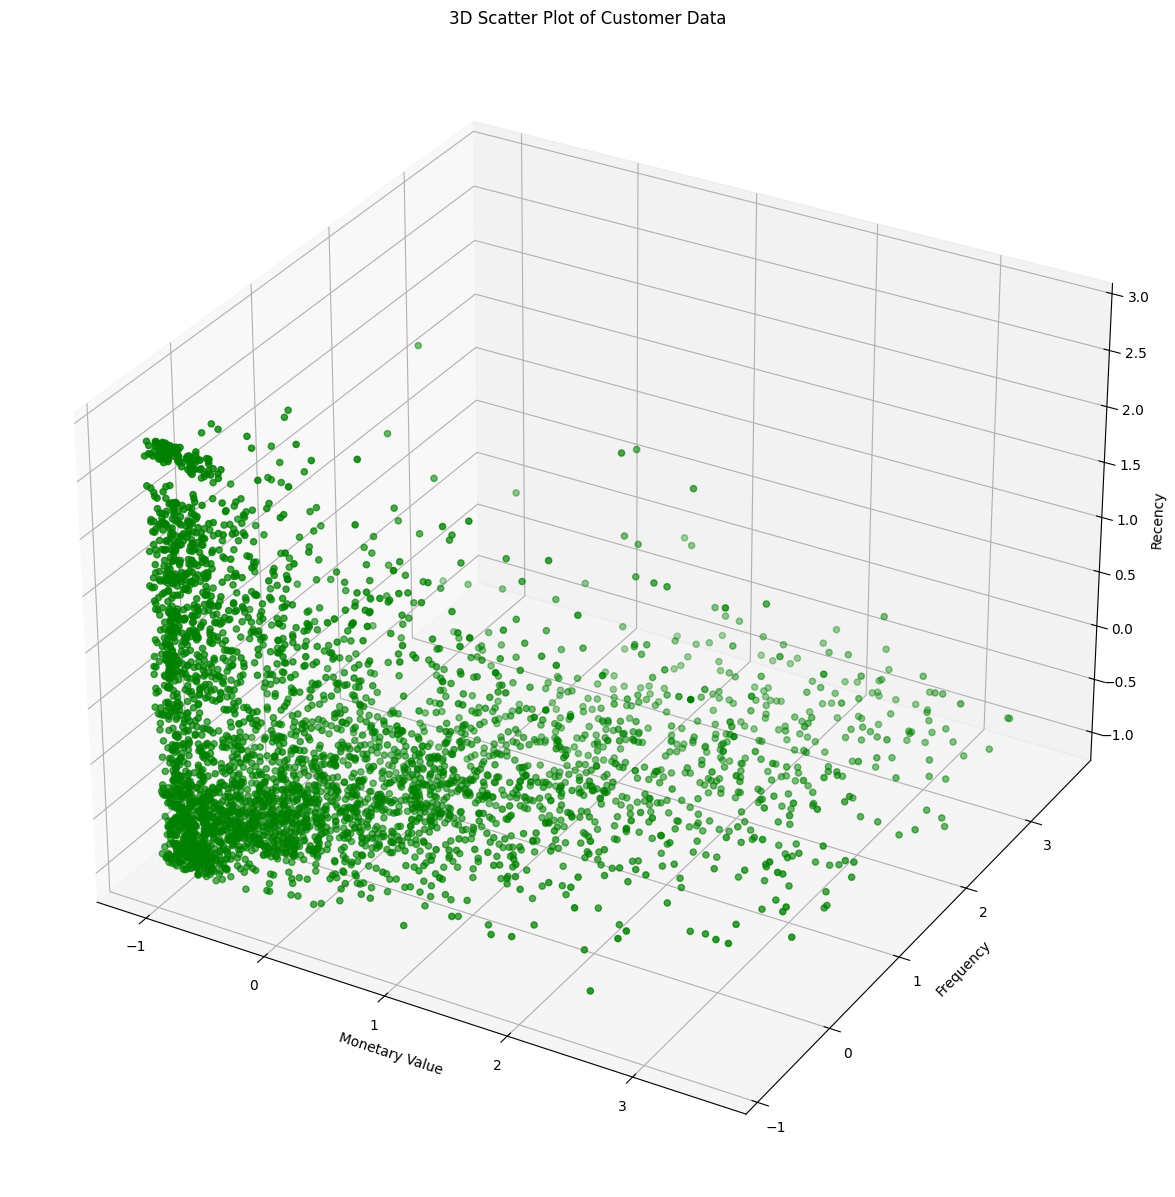

In [65]:
# replot the scatter to make shure that the scales are changed 
fig = plt.figure(figsize=(15, 15))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(scaled_data_df["MonetaryValue"],
                     scaled_data_df["Frequency"],
                     scaled_data_df["Recency"],
                     color='green')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

### KMeans Clustring

# We will plot Inertia and Silhouette scores to choose the number of cluster
- first we will show the elbow method technique and this in the point when we see the elbow of the curve 
- second, to decide the specific numer of cluster we will plot Silhouette scores which is between [1 : -1] for high value there is no overlap between clusters and with lower value there is overlap

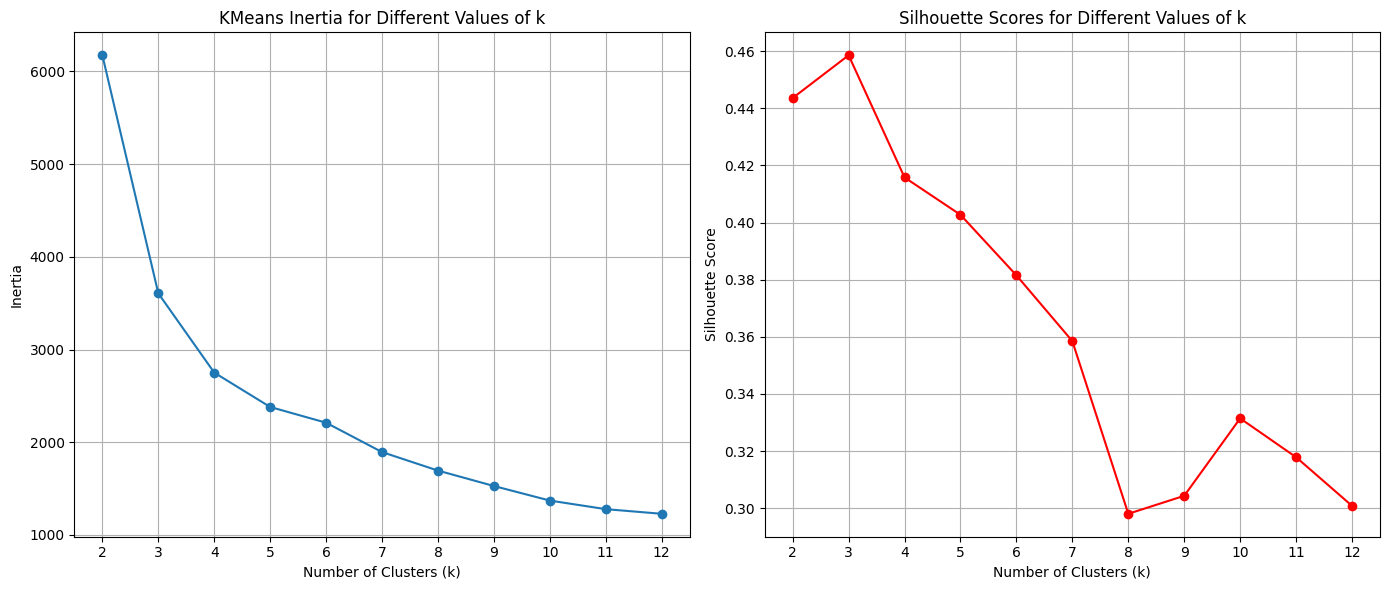

In [ ]:

max_k = 12

inertia = []
silhoutte_scores = []
k_values = range(2, max_k + 1)

for k in k_values:

    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)

    cluster_labels = kmeans.fit_predict(scaled_data_df)

    sil_score = silhouette_score(scaled_data_df, cluster_labels)

    silhoutte_scores.append(sil_score)

    inertia.append(kmeans.inertia_) # inertia is the distance between cluster center and data points in each cluster

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhoutte_scores, marker='o', color='red')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

Note ,  from the result above the elbow is between 4 and 5 clusters and after plotting the Silhouette scores we choose "4" cause it has higher Silhouette scores so lower overlap between clusters

In [75]:
#creating final model after choosing "4"
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)

cluster_labels = kmeans.fit_predict(scaled_data_df)

cluster_labels

array([1, 0, 2, ..., 1, 0, 0])

In [ ]:
# adding the cluster labels to the original data
non_outliers_df["Cluster"] = cluster_labels

non_outliers_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.000,169.360,2,2010-06-28 13:53:00,164,1
1,12347.000,1323.320,2,2010-12-07 14:57:00,2,0
2,12348.000,221.160,1,2010-09-27 14:59:00,73,2
3,12349.000,2221.140,2,2010-10-28 08:23:00,42,0
4,12351.000,300.930,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4280,18283.000,641.770,6,2010-11-22 15:30:00,17,0
4281,18284.000,411.680,1,2010-10-04 11:33:00,66,2
4282,18285.000,377.000,1,2010-02-17 10:24:00,295,1
4283,18286.000,1246.430,2,2010-08-20 11:57:00,111,0


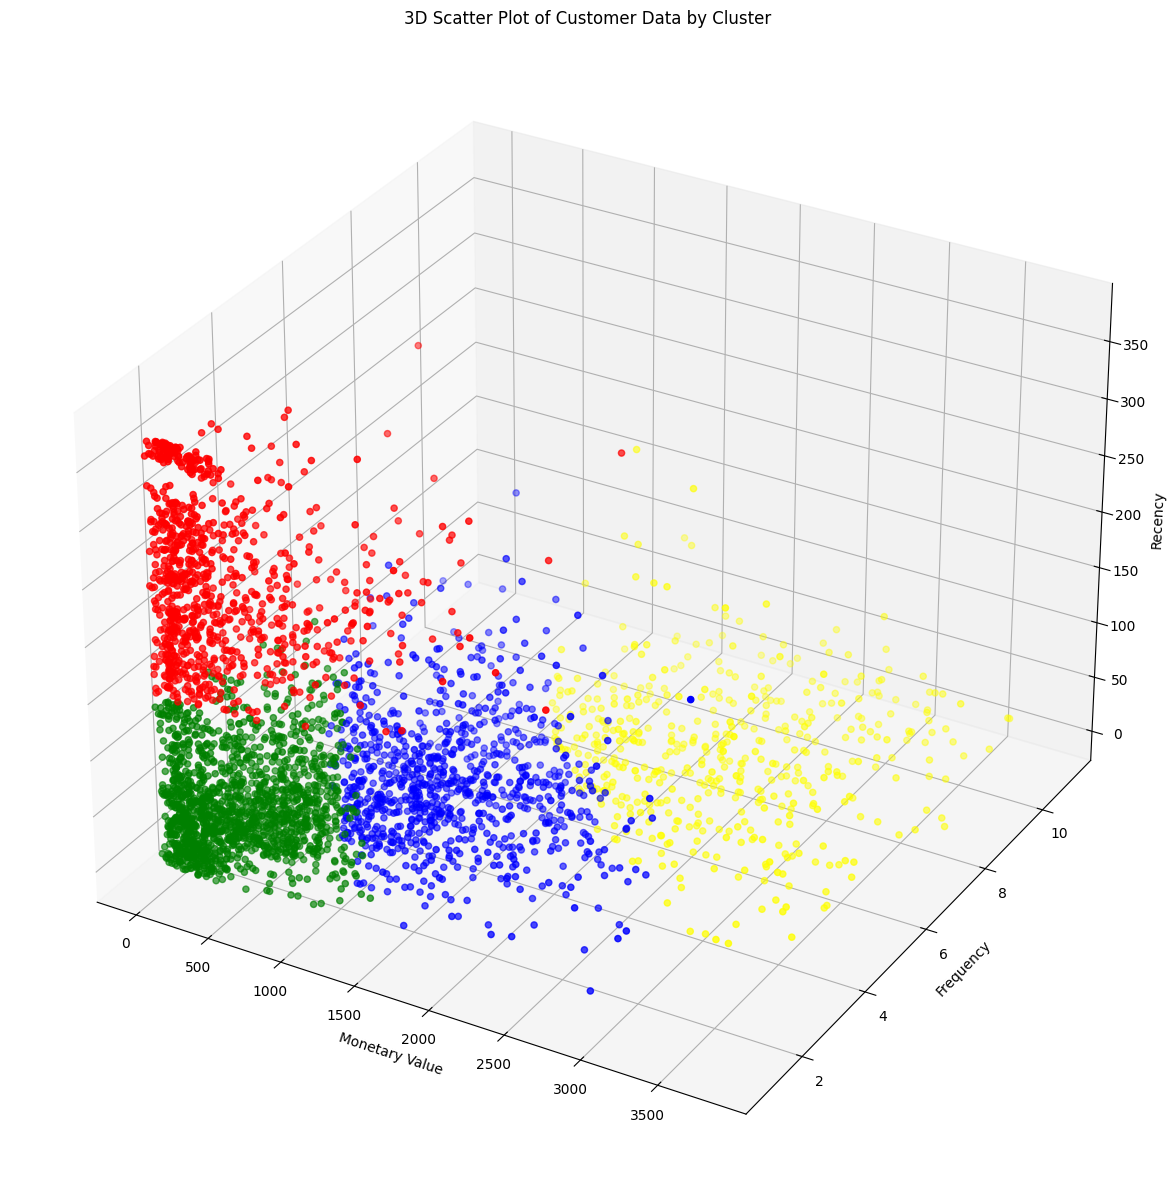

In [82]:
cluster_colors = {0: 'blue',  # Blue
                  1: 'red',  # Red
                  2: 'green',  # Green
                  3: 'yellow'}  # Yellow

colors = non_outliers_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(non_outliers_df['MonetaryValue'], 
                     non_outliers_df['Frequency'], 
                     non_outliers_df['Recency'], 
                     c=colors,  # Use mapped solid colors
                     marker='o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.show()

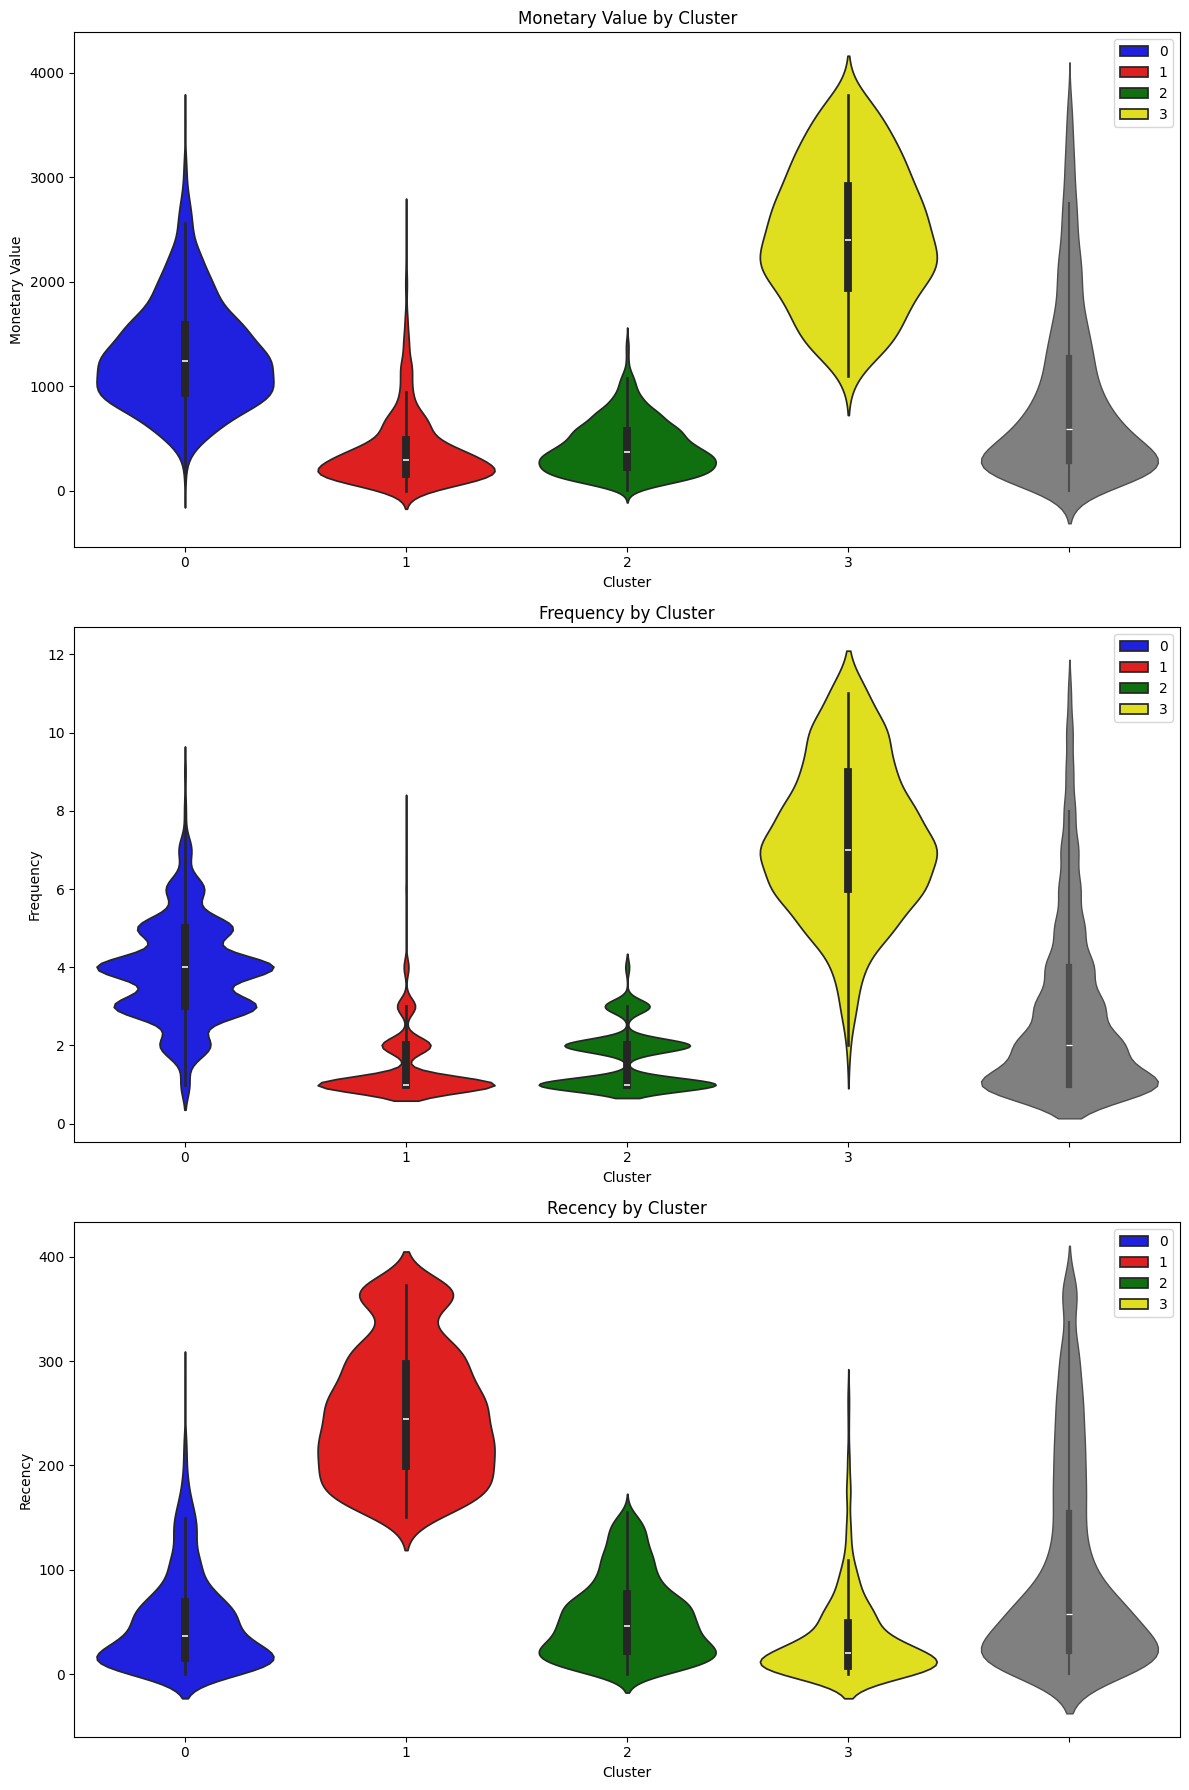

In [81]:
plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['MonetaryValue'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Frequency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')


plt.subplot(3, 1, 3)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Recency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

# from this plot we see that  
💰 1. Monetary Value by Cluster
- Cluster 3 (Yellow):
    - Highest median and widest spread → These customers spend the most and vary widely in spending.
    - Likely your VIP/high-value customers.
- Cluster 2 (Green):
    - Lowest median and narrow spread → Low spenders with little variation.
    - Possibly low-value or one-time buyers.
- Cluster 0 (Blue) and Cluster 1 (Red):
    - Moderate spenders with tighter distributions.
    - Could represent steady mid-tier customers.

🔁 2. Frequency by Cluster
- Cluster 3 (Yellow) again dominates:
    - High frequency and wide spread → Repeat buyers, highly engaged.
    - Ideal for loyalty programs or premium targeting.
- Cluster 2 (Green):
    - Low frequency → Likely infrequent or one-time purchasers.
- Cluster 0 (Blue) and Cluster 1 (Red):
    - Moderate frequency → Occasional buyers, worth nurturing.

⏳ 3. Recency by Cluster
- Cluster 1 (Red):
    - High recency → These customers haven’t purchased in a while.
    - Candidates for reactivation campaigns.
- Cluster 3 (Yellow):
    - Low recency → Very recent purchases.
    - Active and engaged customers.
- Cluster 0 (Blue) and Cluster 2 (Green):
    - Mixed recency → May need targeted follow-ups.


In [ ]:

# identify customers who are outliers in both monetary and frequency dimensions

overlap_indices = monetary_outliers_df.index.intersection(frequency_outliers_df.index)

# Removes overlapping outliers from each DataFrame

monetary_only_outliers = monetary_outliers_df.drop(overlap_indices)
frequency_only_outliers = frequency_outliers_df.drop(overlap_indices)
monetary_and_frequency_outliers = monetary_outliers_df.loc[overlap_indices]

monetary_only_outliers["Cluster"] = -1
frequency_only_outliers["Cluster"] = -2
monetary_and_frequency_outliers["Cluster"] = -3

# Concatenates all outlier subsets into one DataFrame
outlier_clusters_df = pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_and_frequency_outliers])

outlier_clusters_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
9,12357.000,11229.990,1,2010-11-16 10:05:00,23,-1
25,12380.000,4782.840,4,2010-08-31 14:54:00,100,-1
42,12409.000,12346.620,4,2010-10-15 10:24:00,55,-1
48,12415.000,19468.840,4,2010-11-29 15:07:00,10,-1
61,12431.000,4145.520,11,2010-12-01 10:03:00,8,-1
...,...,...,...,...,...,...
4235,18223.000,7516.310,12,2010-11-17 12:20:00,22,-3
4236,18225.000,7545.140,15,2010-12-09 15:46:00,0,-3
4237,18226.000,6650.830,15,2010-11-26 15:51:00,13,-3
4241,18231.000,4791.800,23,2010-10-29 14:17:00,41,-3


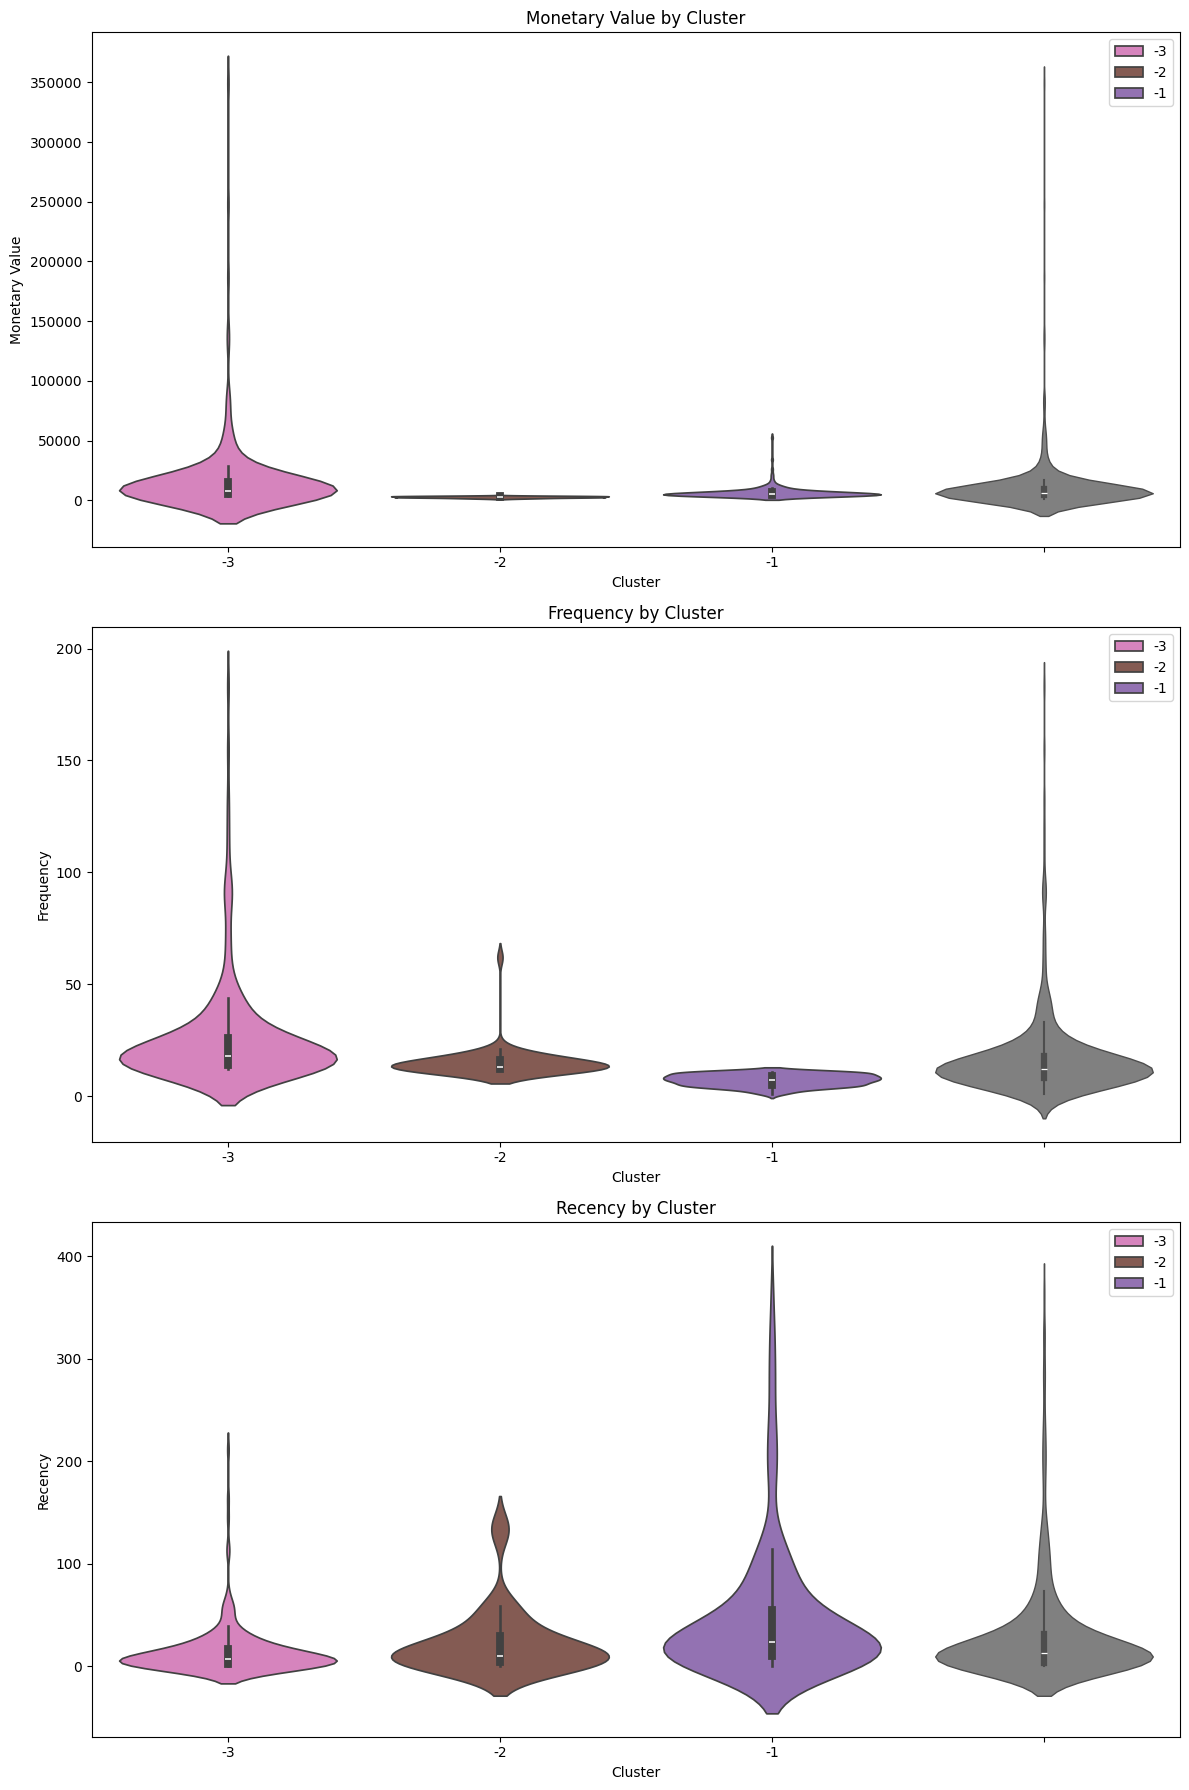

In [57]:
cluster_colors = {-1: '#9467bd',
                  -2: '#8c564b',
                  -3: '#e377c2'}

plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['MonetaryValue'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Frequency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Recency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

# shows how customers labeled as outliers (Clusters -1, -2, -3) compare to the main cluster (Cluster 1) across Monetary, Frequency, and Recency metrics
💰 1. Monetary Value by Cluster
- Cluster -3 (dual outliers):
    - Extremely high monetary values (up to £350,000!)
    - These are high-spending, high-frequency customers—possibly corporate buyers or bulk purchasers.
- Cluster -2 (frequency-only outliers):
    - Near-zero monetary value → Frequent but low-spending customers.
    - Could be browsers or micro-purchasers.
- Cluster -1 (monetary-only outliers):
    - Moderate monetary value (up to £50,000) but low frequency.
    - Likely one-time big spenders.
- Cluster 1 (main group):
    - Broad distribution, peaking near zero but extending to £100,000.
    - Represents the general customer base.

🔁 2. Frequency by Cluster
- Cluster -3:
    - High frequency (up to 200) → Very engaged repeat buyers.
- Cluster -2:
    - Frequency near zero → Possibly inactive or anomalous entries.
- Cluster -1:
    - Low frequency (up to 50) → Infrequent but high-value.
- Cluster 1:
    - Wide spread, peaking near zero → Typical frequency distribution.

⏳ 3. Recency by Cluster
- Cluster -3:
    - Moderate recency (peak ~50, up to 200) → Recent and active.
- Cluster -2:
    - Very low recency → Possibly very recent but low-value.
- Cluster -1:
    - Moderate recency → Recent one-time spenders.
- Cluster 1:
    - Broad spread, peak around 100 → Mixed recency across the general population.

🧠 Strategic Insights
- Cluster -3: High-value, high-frequency, recent → Top-tier VIPs. Consider exclusive offers or loyalty programs.

- Cluster -2: Frequent but low-value → Upsell opportunities or investigate for bot-like behavior.

- Cluster -1: Big spenders with low frequency → Retention targets.

- Cluster 1: General population → Use RFM scores to further segment.



In [58]:
cluster_labels = {
    0: "RETAIN",
    1: "RE-ENGAGE",
    2: "NURTURE",
    3: "REWARD",
    -1: "PAMPER",
    -2: "UPSELL",
    -3: "DELIGHT"
}

In [ ]:
# creating a unified dataset with all customers—regular and outliers
full_clustering_df = pd.concat([non_outliers_df, outlier_clusters_df])

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.000,169.360,2,2010-06-28 13:53:00,164,1
1,12347.000,1323.320,2,2010-12-07 14:57:00,2,0
2,12348.000,221.160,1,2010-09-27 14:59:00,73,2
3,12349.000,2221.140,2,2010-10-28 08:23:00,42,0
4,12351.000,300.930,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4235,18223.000,7516.310,12,2010-11-17 12:20:00,22,-3
4236,18225.000,7545.140,15,2010-12-09 15:46:00,0,-3
4237,18226.000,6650.830,15,2010-11-26 15:51:00,13,-3
4241,18231.000,4791.800,23,2010-10-29 14:17:00,41,-3


In [ ]:
# mapping semantic labels to your cluster IDs
full_clustering_df["ClusterLabel"] = full_clustering_df["Cluster"].map(cluster_labels)

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster,ClusterLabel
0,12346.000,169.360,2,2010-06-28 13:53:00,164,1,RE-ENGAGE
1,12347.000,1323.320,2,2010-12-07 14:57:00,2,0,RETAIN
2,12348.000,221.160,1,2010-09-27 14:59:00,73,2,NURTURE
3,12349.000,2221.140,2,2010-10-28 08:23:00,42,0,RETAIN
4,12351.000,300.930,1,2010-11-29 15:23:00,10,2,NURTURE
...,...,...,...,...,...,...,...
4235,18223.000,7516.310,12,2010-11-17 12:20:00,22,-3,DELIGHT
4236,18225.000,7545.140,15,2010-12-09 15:46:00,0,-3,DELIGHT
4237,18226.000,6650.830,15,2010-11-26 15:51:00,13,-3,DELIGHT
4241,18231.000,4791.800,23,2010-10-29 14:17:00,41,-3,DELIGHT


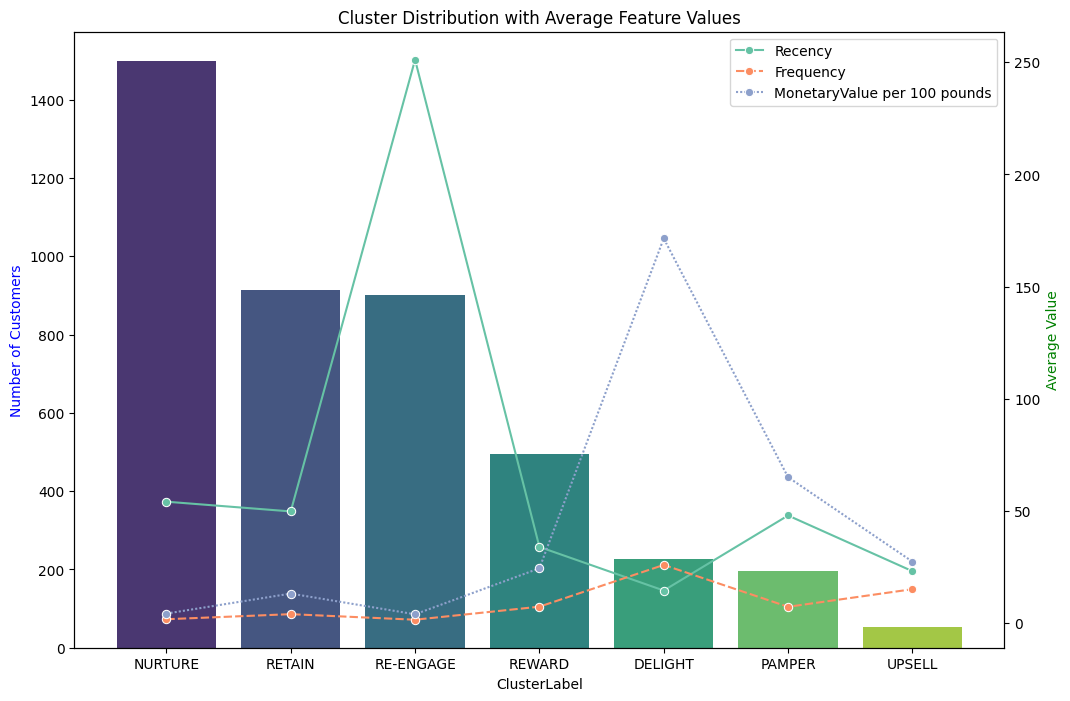

In [ ]:
# Count Customers per Cluster
cluster_counts = full_clustering_df['ClusterLabel'].value_counts()
# Scale Monetary Value
full_clustering_df["MonetaryValue per 100 pounds"] = full_clustering_df["MonetaryValue"] / 100.00
# Compute Feature Averages per Cluster
feature_means = full_clustering_df.groupby('ClusterLabel')[['Recency', 'Frequency', 'MonetaryValue per 100 pounds']].mean()

# Create Plot Canvas
fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis', hue=cluster_counts.index)
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

ax2 = ax1.twinx()

sns.lineplot(data=feature_means, ax=ax2, palette='Set2', marker='o')
ax2.set_ylabel('Average Value', color='g')

plt.show()


## 📊 Chart Overview: "Cluster Distribution with Average Feature Values"

### 🟪 Left Y-Axis: **Number of Customers**
- Represented by **vertical bars**.
- Shows how many customers fall into each cluster.

### 🟩 Right Y-Axis: **Average Feature Values**
- Represented by **three line plots**:
  - 🟢 **Recency** (green solid line): How recently customers made a purchase.
  - 🟠 **Frequency** (orange dashed line): How often they purchase.
  - 🔵 **Monetary Value per 100 pounds** (blue dotted line): How much they spend, scaled.

---

## 📌 Cluster Insights

| Cluster     | # Customers | Recency ↑ | Frequency ↑ | Monetary ↑ | Interpretation |
|-------------|-------------|-----------|-------------|------------|----------------|
| **NURTURE** | Highest     | Low       | Low         | Low        | Large group of disengaged, low-value customers. |
| **RETAIN**  | Moderate    | Medium    | Low         | Low        | Customers at risk of churn, need retention efforts. |
| **RE-ENGAGE** | Moderate  | **High**  | Low         | Low        | Long inactive customers — reactivation campaigns needed. |
| **REWARD**  | Moderate    | Medium    | Medium      | Medium     | Steady performers — good candidates for loyalty rewards. |
| **DELIGHT** | Lower       | Low       | Medium      | **High**   | High spenders — keep them happy with premium service. |
| **PAMPER**  | Low         | Medium    | Medium      | Medium     | Valuable but not frequent — nurture with personalized offers. |
| **UPSELL**  | Lowest      | Medium    | Low         | Medium     | Small segment — potential for growth via upselling. |

---

## 🎯 Strategic Takeaways

- **NURTURE**: Largest segment but low engagement — automate onboarding or drip campaigns.
- **RE-ENGAGE**: High recency = long dormancy — consider win-back emails or discounts.
- **DELIGHT**: Highest spenders — prioritize retention, offer VIP perks.
- **UPSELL**: Small but promising — test cross-sell or bundle strategies.

---

## 🧠 Why This Visualization Works

- Combines **volume** and **behavioral metrics** in one view.
- Makes it easy to **prioritize marketing actions** per segment.
- Helps communicate complex clustering results to non-technical stakeholders.

---

